In [6]:
import requests
import json
import os
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [36]:
api_key = "-o3YQPH9zXRxBs1zYaMp"
indicator_id = "ZSFH"
region_id = ["48310", "98034"]
#region_id = "48310"

zillow_list = []
zillow_url = []

for region in region_id:
    url = f"https://data.nasdaq.com/api/v3/datatables/ZILLOW/DATA?indicator_id={indicator_id}&region_id={region}&api_key={api_key}"   
    zillow = requests.get(url).json()
    
    #zillow_url.append(zillow)
    #print(zillow_url)
    
    zillow_data = zillow['datatable']['data']
    iterations_zillow = range(0,len(zillow_data))

    for i in iterations_zillow:
        clean_zillow = zillow_data[i]
        zillow_list.append(clean_zillow)

zillow_df = pd.DataFrame(zillow_list, columns=['Indicator ID', 'Zip Code', 'Date', 'Average Value'])

    #add quarters to dataframe
zillow_df["Date"] = pd.to_datetime(zillow_df["Date"])
zillow_df["Quarter"] = zillow_df["Date"].dt.to_period('Q')

    #drop duplicate quarters to get end of quarter value and reset index
zillow_drop_df = zillow_df.drop_duplicates(subset=['Quarter']).reset_index().drop(columns=["index",])

zillow_drop_df


,Indicator ID,Zip Code,Date,Average Value,Quarter
0,ZSFH,48310,2022-12-31,420386.0,2022Q4
1,ZSFH,48310,2022-09-30,424230.0,2022Q3
2,ZSFH,48310,2022-06-30,422575.0,2022Q2
3,ZSFH,48310,2022-03-31,415626.0,2022Q1
4,ZSFH,48310,2021-12-31,391604.0,2021Q4
...,...,...,...,...,...
103,ZSFH,48310,1997-03-31,102019.0,1997Q1
104,ZSFH,48310,1996-12-31,100316.0,1996Q4
105,ZSFH,48310,1996-09-30,99447.0,1996Q3
106,ZSFH,48310,1996-06-30,98922.0,1996Q2


In [4]:
api_key = "-o3YQPH9zXRxBs1zYaMp"
start_date = "1996-03-01"
end_date = "2023-01-01"
url1 = "RATEINF"
url2 = "CPI_USA"

federal_list = []

url = f"https://data.nasdaq.com/api/v3/datasets/{url1}/{url2}.json?start_date={start_date}&end_date={end_date}&api_key={api_key}"
    
federal = requests.get(url).json()

federal_data = federal["dataset"]["data"]
iterations_federal = range(0,len(federal_data))

for i in iterations_federal:
    clean_federal = federal_data[i]
    federal_list.append(clean_federal)
    
federal_df = pd.DataFrame(federal_list, columns=['Date', url2])


federal_df["Date"] = pd.to_datetime(federal_df["Date"])
federal_df["Quarter"] = federal_df["Date"].dt.to_period('Q')

federal_drop_df = federal_df.drop_duplicates(subset=['Quarter']).reset_index().drop(columns=["index",])

federal_drop_df.head()

,Date,CPI_USA,Quarter
0,2022-12-31,296.797,2022Q4
1,2022-09-30,296.808,2022Q3
2,2022-06-30,296.311,2022Q2
3,2022-03-31,287.504,2022Q1
4,2021-12-31,278.802,2021Q4


In [5]:
    #change to merge on Quarter after figuring out how to change date
combined_df = pd.merge(zillow_drop_df, federal_drop_df, left_index=True, right_index=True)
combined_df = combined_df.rename(columns = {"Quarter_x":"Quarter", "Date_x":"Date"}).drop(columns=["Quarter_y", "Date_y"])
combined_df

,Indicator ID,Zip Code,Date,Average Value,Quarter,CPI_USA
0,ZSFH,98101,2022-12-31,728473.0,2022Q4,296.797
1,ZSFH,98101,2022-09-30,735541.0,2022Q3,296.808
2,ZSFH,98101,2022-06-30,675192.0,2022Q2,296.311
3,ZSFH,98101,2022-03-31,773743.0,2022Q1,287.504
4,ZSFH,98101,2021-12-31,766846.0,2021Q4,278.802
5,ZSFH,98101,2021-09-30,700994.0,2021Q3,274.310
6,ZSFH,98101,2021-06-30,498753.0,2021Q2,271.696
7,ZSFH,98101,2021-03-31,453639.0,2021Q1,264.877
8,ZSFH,98101,2020-12-31,472979.0,2020Q4,260.474
9,ZSFH,98101,2020-09-30,457069.0,2020Q3,260.280


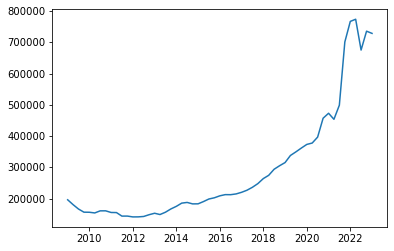

In [9]:
plt.plot(combined_df["Date"], combined_df["Average Value"],)